In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet152
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
def load_and_process_images(path_dir, class_labels, target_num_images):
    images = []
    labels = []
    min_images = 99999999
    class_images = {}
    
    for label, class_name in enumerate(class_labels):
        class_dir = os.path.join(path_dir, class_name)
        class_images[class_name] = []
        
        if not os.path.exists(class_dir):
            print(f"Directory '{class_name}' not found in '{path_dir}'. Skipping...")
            continue
        
        for jpg in os.listdir(class_dir):
            image_path = os.path.join(class_dir, jpg)
            image_high_resolution = cv2.imread(image_path)
            
            if image_high_resolution is None:
                print(f"Could not read image '{jpg}' in '{class_name}' directory. Skipping...")
                continue
            
            # print(f"Reading image '{jpg}' in '{class_name}' directory...")
            image_change_color = cv2.cvtColor(image_high_resolution, cv2.COLOR_BGR2RGB)
            image_low_resolution = cv2.resize(image_change_color, (200, 200))
            class_images[class_name].append(image_low_resolution)
            min_images = min(min_images, len(class_images[class_name]))
        print(f"Class '{class_name}' has {len(class_images[class_name])} images.")


    for class_name, images_list in class_images.items():
        if len(images_list) > target_num_images:
            images.extend(images_list[:target_num_images])
            labels.extend([class_name] * target_num_images)
        else:
            images.extend(images_list)
            labels.extend([class_name] * len(images_list))
    
    return np.asarray(images), np.asarray(labels), min_images, class_images



dataset_directory = './Datasets/DataImages/'
class_labels = ['Catla', 'Cyprinus carpio', 'Grass Carp', 'Mori', 'Rohu', 'Silver']
target_num_images = 50

images, labels, min_images, class_images = load_and_process_images(dataset_directory, class_labels, target_num_images)

print(f"Number of images: {len(images)}")
print(f"Number of labels: {len(labels)}")


Class 'Catla' has 20 images.
Class 'Cyprinus carpio' has 50 images.
Class 'Grass Carp' has 11 images.
Class 'Mori' has 70 images.
Class 'Rohu' has 73 images.
Class 'Silver' has 47 images.
Number of images: 228
Number of labels: 228


In [3]:
def Image_Populator(class_images, min_images, method='flip'):
    new_images = []
    new_labels = []
    
    for class_name, images in class_images.items():
        num_images = len(images)
        if num_images < min_images:
            num_to_generate = min_images - num_images
            print(f"Populating class '{class_name}' with {num_to_generate} new images using {method}...")
            
            for i in range(num_to_generate):
                original_image = images[i % num_images]
                if method == 'rotate_180':
                    new_image = np.rot90(original_image, 2)
                elif method == 'flip':
                    new_image = np.fliplr(original_image)
                elif method == 'rotate_270':
                    new_image = np.rot90(original_image, 3)
                elif method == 'rotate_90':
                    new_image = np.rot90(original_image)
                elif method == 'flip_rotate_270':
                    new_image = np.rot90(np.fliplr(original_image), 3)
                
                new_images.append(new_image)
                new_labels.append(class_name)
    
    return np.asarray(new_images), np.asarray(new_labels)


In [4]:
if len(images) == 0:
    print("No images found. Exiting...")
else:
    X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

    # Choose one of the methods: 'rotate_180', 'flip', 'rotate_270', 'rotate_90', 'flip_rotate_270'
    method = 'rotate_180'
    X_train_new, y_train_new = Image_Populator(class_images, target_num_images, method)

    print(X_train_new.shape)
    print(f"Number of new labels: {len(y_train_new)}")

    # Concatenate the original training data with the new generated data
    X_train = np.concatenate([X_train, X_train_new])
    y_train = np.concatenate([y_train, y_train_new])

    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train)
    y_test_encoded = label_encoder.fit_transform(y_test)

Populating class 'Catla' with 30 new images using rotate_180...
Populating class 'Grass Carp' with 39 new images using rotate_180...
Populating class 'Silver' with 3 new images using rotate_180...
(72, 200, 200, 3)
Number of new labels: 72


In [5]:
print(images.shape)
print(labels.shape)
print(min_images)

(228, 200, 200, 3)
(228,)
1


In [6]:
print(X_train.shape)
print(y_train.shape)

(254, 200, 200, 3)
(254,)


Epoch 1/20
8/8 [==============================] - 36s 4s/step - loss: 33.0539 - accuracy: 0.3976 - val_loss: 30.6829 - val_accuracy: 0.5000
Epoch 2/20
8/8 [==============================] - 24s 3s/step - loss: 12.1571 - accuracy: 0.7087 - val_loss: 5.7517 - val_accuracy: 0.7391
Epoch 3/20
8/8 [==============================] - 24s 3s/step - loss: 3.5768 - accuracy: 0.8622 - val_loss: 4.9656 - val_accuracy: 0.8043
Epoch 4/20
8/8 [==============================] - 24s 3s/step - loss: 1.0054 - accuracy: 0.9291 - val_loss: 5.2874 - val_accuracy: 0.8043
Epoch 5/20
8/8 [==============================] - 24s 3s/step - loss: 0.8508 - accuracy: 0.9409 - val_loss: 2.8870 - val_accuracy: 0.8478
Epoch 6/20
8/8 [==============================] - 24s 3s/step - loss: 0.9300 - accuracy: 0.9449 - val_loss: 3.6022 - val_accuracy: 0.8696
Epoch 7/20
8/8 [==============================] - 24s 3s/step - loss: 0.4759 - accuracy: 0.9449 - val_loss: 4.1557 - val_accuracy: 0.7826
Epoch 8/20
8/8 [===============

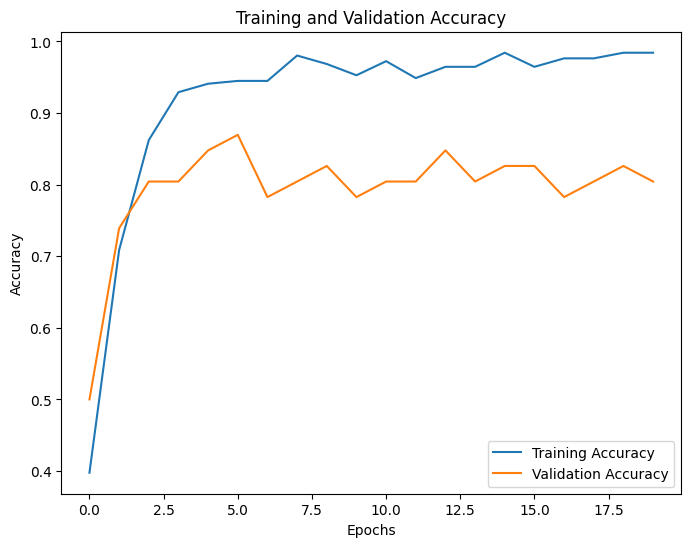

2/2 [==============================] - 4s 1s/step - loss: 3.6543 - accuracy: 0.8043
Test Accuracy: 80.43%


In [21]:

base_model = ResNet152(weights='imagenet', include_top=False, input_shape=(200, 200, 3))

# add a Fully connected later for better loss 

for layer in base_model.layers:
    layer.trainable = False

model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(len(class_labels), activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train_encoded, epochs=20, batch_size=32, validation_data=(X_test, y_test_encoded))

plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


In [14]:
from sklearn.metrics import classification_report

predictions = model.predict(X_test)

predicted_classes = np.argmax(predictions, axis=1)

class_names = class_labels  # Assuming class_labels is a list of strings

# Convert class_names to a dictionary for easy lookup
class_dict = {class_name: i for i, class_name in enumerate(class_names)}

# Convert string labels in y_test to integers
y_test_int = np.array([class_dict[label] for label in y_test])

for i in range(len(y_test_int)):
    true_class = class_names[y_test_int[i]]
    predicted_class = class_names[predicted_classes[i]]
    print(f"{true_class}, {predicted_class}")

print(classification_report(y_test_int, predicted_classes, target_names=class_names))


2/2 [==============================] - 4s 1s/step
Silver, Silver
Cyprinus carpio, Cyprinus carpio
Catla, Catla
Silver, Silver
Catla, Cyprinus carpio
Silver, Silver
Cyprinus carpio, Cyprinus carpio
Silver, Silver
Rohu, Rohu
Mori, Rohu
Silver, Silver
Catla, Cyprinus carpio
Mori, Mori
Rohu, Rohu
Silver, Silver
Rohu, Rohu
Rohu, Rohu
Cyprinus carpio, Cyprinus carpio
Silver, Silver
Silver, Silver
Mori, Mori
Rohu, Cyprinus carpio
Silver, Silver
Rohu, Mori
Mori, Mori
Catla, Cyprinus carpio
Rohu, Rohu
Mori, Mori
Mori, Mori
Mori, Mori
Silver, Silver
Cyprinus carpio, Cyprinus carpio
Mori, Mori
Cyprinus carpio, Cyprinus carpio
Catla, Catla
Mori, Mori
Rohu, Mori
Mori, Rohu
Mori, Mori
Rohu, Cyprinus carpio
Mori, Mori
Rohu, Rohu
Rohu, Rohu
Grass Carp, Grass Carp
Mori, Mori
Mori, Mori
                 precision    recall  f1-score   support

          Catla       1.00      0.40      0.57         5
Cyprinus carpio       0.50      1.00      0.67         5
     Grass Carp       1.00      1.00      1.00  

In [13]:
print(y_test.dtype)
print(predicted_classes.dtype)


<U15
int64


In [20]:
import cv2
from tensorflow.keras.preprocessing import image as keras_image

custom_image_path = './Datasets/popular-rohu-rohit-fish-indian-subcontinent-over-white-background-76376014.webp'
custom_image = cv2.imread(custom_image_path)
custom_image = cv2.cvtColor(custom_image, cv2.COLOR_BGR2RGB)
custom_image = cv2.resize(custom_image, (200, 200)) 
custom_image = custom_image.astype('float32') / 255.0 

custom_image = np.expand_dims(custom_image, axis=0)

predictions = model.predict(custom_image)
predicted_class_index = np.argmax(predictions[0])
predicted_class = class_labels[predicted_class_index]

print(f"Predicted Class: {predicted_class}")


1/1 [==============================] - 0s 142ms/step
Predicted Class: Catla
